In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
class Carga():
    def __init__(self,value, position):
        self.__carga = value
        self.__position = position
    
    def getCarga(self):
        return self.__carga
    
    def getPosition(self):
        return self.__position
    
    def getxPosition(self):
        return self.__position[0]
    
    def getyPosition(self):
        return self.__position[1]

In [61]:
epsilon = 8.85418782e-12
def electric_field(position,charge):
    carga_list = charge
    x_position = position[0]
    y_position = position[1]
    campo_Ex,campo_Ey =0.,0.
    
    for q in carga_list:
        r = np.sqrt((x_position - q.getxPosition())**2 + (y_position - q.getyPosition())**2)
        campo_Ex += (q.getCarga()*(x_position - q.getxPosition()))/(r**3)
        campo_Ey += (q.getCarga()*(y_position - q.getyPosition()))/(r**3)
    
    campo_Ex = campo_Ex/(4*np.pi*epsilon)
    campo_Ey = campo_Ey/(4*np.pi*epsilon)
    
    return [campo_Ex,campo_Ey]

def condition(xy,chages):
    x = xy[0]
    y = xy[1]
    chage_list = chages
    
    for q in charge_list:
        if (abs(xe - q.getxPosition())<0.1 and abs(ye -q.getyPosition()<0.1))and((xe-q.getxPosition())+(ye-q.getyPosition())>0):
            return False
        
    return True


def condition_2(xy,chages):
    x = xy[0]
    y = xy[1]
    chage_list = chages
    
    for q in charge_list:
        if (abs(xe - q.getxPosition())<0.005 and abs(ye -q.getyPosition()<0.005))and((xe-q.getxPosition())+(ye-q.getyPosition())>0):
            return False
    
    return True

------------
------------
------------
------------
------------


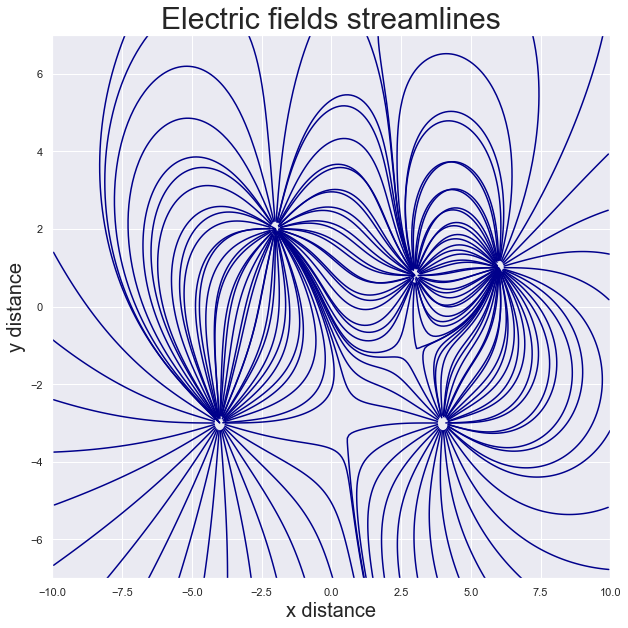

In [70]:

fig = plt.figure(figsize=(10,10))
plt.xlim((-10,10))
plt.ylim((-7,7))
plt.title('Electric fields streamlines',size=30)
plt.xlabel('x distance',size=20)
plt.ylabel('y distance',size=20)

NLE = 30 # Numero de linhas por carga
charge_list = [Carga(1e-6,(-2,2)),Carga(-1e-6,(3,0.8)),Carga(-1e-6,(4,-3)),Carga(-2e-6,(-4,-3)),Carga(1.4e-6,(6,1))]
DLE = 0.1 # Incremento na linha
cont = 0

for c in charge_list:
    print('------------')
    
    for i in range(0,NLE):
        theta = 2*np.pi*(i)/NLE
        xs = c.getxPosition() + 0.2*np.cos(theta)
        ys = c.getyPosition() + 0.2*np.sin(theta)
        xe = xs
        ye = ys
        
        Ex = []
        Ey = []
        Ex.append(xe)
        Ey.append(ye)
        
        while(True):
            
            ex,ey = electric_field((xe,ye),charge_list) # calcula o campo elétrico no potno (xe,ye)
            mod_e = np.sqrt(ex**2 + ey**2) # calcula o módulo do campo no ponto
            
            # verificando para ponto em que o módulo do campo seja inferior a um dado valor
            if mod_e <= 0.005:
                break
            
            dx = DLE*ex/mod_e # definindo o passo em x
            dy = DLE*ey/mod_e # definindo o passo em y
            
            # se a carga for negativa temos que inverter a direção
            if c.getCarga()<0:
                dx = -1*dx
                dy = -1*dy
            
            xe = xe + dx # incrementa o passo em x
            ye = ye + dy # incrementa o passo em y
            
            # verificar se não temos um ponto muito fora da área
            if abs(xe)>=10 or abs(ye)>=10:
                break
            
            # verificar algum ponto singular
            if not(condition((xe,ye),charge_list)):
                break
                
            Ex.append(xe)
            Ey.append(ye)
            
        plt.plot(Ex,Ey,'-',color='darkblue')
          

plt.show()

TypeError: Input must be a 2D array.

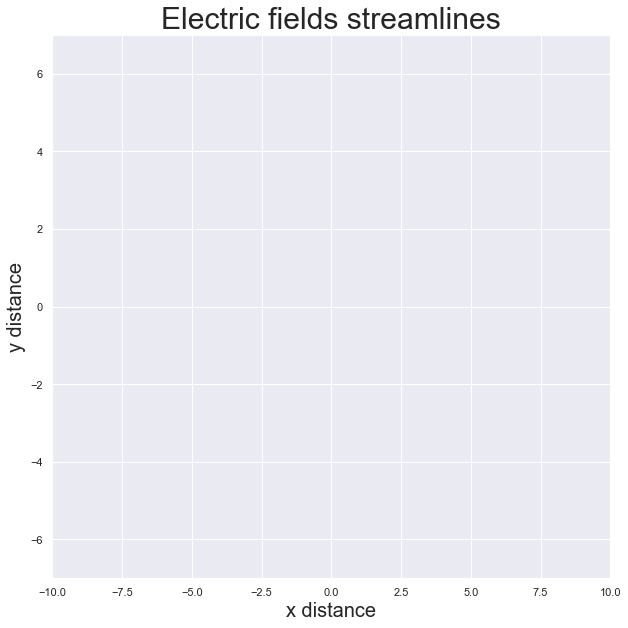

In [85]:

fig = plt.figure(figsize=(10,10))
plt.xlim((-10,10))
plt.ylim((-7,7))
plt.title('Electric fields streamlines',size=30)
plt.xlabel('x distance',size=20)
plt.ylabel('y distance',size=20)

NVL = 3 # Numero de equipoetenciais por carga
charge_list = [Carga(1e-6,(0,0)),Carga(1e-6,(1,1))]
DVL = 0.2# Incremento na linha

DELTA = 0.2
for q in charge_list:
        factor = .5
        for i in range(0,NVL):
            xs = q.getxPosition() + factor*np.cos(np.pi/4)
            ys = q.getyPosition() + factor*np.sin(np.pi/4)
            
            if np.abs(xs)>=10 or np.abs(ys)>=10:
                break
                
            DIR = 1
            xv = xs
            yv = ys
            Vx=[]
            Vy=[]
            Vx.append(xv)
            Vy.append(yv)
            
            N=1
            while(True):
                ex,ey = electric_field((xv,yv),charge_list) # calcula o campo elétrico no potno (xe,ye)
                mod_e = np.sqrt(ex**2 + ey**2) # calcula o módulo do campo no ponto
                
                if mod_e<=0.0005:
                    factor = 2*factor
                    break
                
                dx = -1.*DVL*ey/mod_e
                dy =  DVL*ex/mod_e
                xv = xv + DIR*dx
                yv = yv + DIR*dy
                
                r0 = np.sqrt((xv-xs)**2+(yv-ys)**2)
                
                if r0<DELTA and N<50:
                    factor = 2*factor
                    break
                
                if abs(xv)>10 or abs(yv)>10:
                    DIR = DIR -2
                    xv = xs
                    yv = ys
                    if abs(DIR)>1:
                        factor = 2*factor
                        break 
                    
                    elif not(condition_2((xv,yv),charge_list)):
                        break

                Vx.append(xv)
                Vy.append(yv)
                
            
            plt.contour(Vx,Vy)
            
plt.show()


            